# Modules

In [1]:
import json
from glob import glob
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from proj.conf import abstract, introduction
from proj.promptfoo import read_results

# Get list of outputs for each model

In [2]:
INPUT_DIR = abstract.CASES / "phenoplier" / "outputs"
assert INPUT_DIR.exists
display(INPUT_DIR)

PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs')

In [3]:
INPUT_MODELS = sorted(list(INPUT_DIR.glob("*")))

In [4]:
INPUT_MODELS

[PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/claude-3-haiku-20240307'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/claude-3-opus-20240229'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/claude-3-sonnet-20240229'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/gemma-2b-instruct-fp16'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/gpt-3.5-turbo-0125'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/gpt-4-0613'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/gpt-4-turbo-2024-04-09'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor

# Read all results

In [5]:
results = []
for model in INPUT_MODELS:
    model_results = read_results(model)
    results.append(model_results)

In [6]:
len(results)

14

In [7]:
results = pd.concat(results, ignore_index=True)

In [8]:
results.shape

(5880, 10)

In [9]:
results.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting


In [10]:
results["model"].value_counts()

model
claude-3-haiku-20240307             420
claude-3-opus-20240229              420
claude-3-sonnet-20240229            420
gemma-2b-instruct-fp16              420
gpt-3.5-turbo-0125                  420
gpt-4-0613                          420
gpt-4-turbo-2024-04-09              420
llama2-7b-chat-fp16                 420
mistral-7b-instruct-fp16            420
mistral-7b-instruct-v0.2-fp16       420
mixtral-8x22b-instruct-v0.1-q4_1    420
mixtral-8x7b-instruct-v0.1-q8_0     420
starling-lm-7b-alpha-fp16           420
starling-lm-7b-beta-fp16            420
Name: count, dtype: int64

In [11]:
results["prompt"].value_counts()

prompt
candidate_with_metadata    1960
candidate                  1960
baseline                   1960
Name: count, dtype: int64

In [12]:
results["test_description"].value_counts()

test_description
Has no spelling errors                 1470
Starts with background                 1470
Describes method before results        1470
Ends with interpretation of results    1470
Name: count, dtype: int64

In [13]:
results["comp_type"].value_counts()

comp_type
Formatting          5040
Structure            630
Spelling/grammar     210
Name: count, dtype: int64

In [14]:
results["comp_desc"].value_counts()

comp_desc
Starts with capital letter                            840
Ends with a period                                    840
Is a single paragraph                                 840
Doesn't include manuscript title                      840
Doesn't reference authors, keywords, abstract, etc    840
Has roughly the same length as input                  840
Has no spelling errors                                210
Starts with background                                210
Describes method before results                       210
Ends with interpretation of results                   210
Name: count, dtype: int64

# Plot: pass rate

In [15]:
results.groupby(["model", "prompt"]).count()

passed  score_avg  \
model                            prompt                                       
claude-3-haiku-20240307          baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
claude-3-opus-20240229           baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
claude-3-sonnet-20240229         baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
gemma-2b-instruct-fp16           baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
gpt-3.5-turbo-0125               baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
gpt-4-0613                       baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
gpt-4-turbo-2024-04-09           baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
llama2-7b-chat-fp16              baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
mistral-7b-instruct-fp16         baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
mistral-7b-instruct-v0.2-fp16    baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
mixtral-8x22b-instruct-v0.1-q4_1 baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
mixtral-8x7b-instruct-v0.1-q8_0  baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
starling-lm-7b-alpha-fp16        baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
starling-lm-7b-beta-fp16         baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   

                                                          test_description  \
model                            prompt                                      
claude-3-haiku-20240307          baseline                              140   
                                 candidate                             140   
                                 candidate_with_metadata               140   
claude-3-opus-20240229           baseline                              140   
                                 candidate                             140   
                                 ca

## Prompt: `candidate_with_metadata`

In [16]:
pass_rate = results[results["prompt"].isin(("candidate_with_metadata",))].groupby(["model"])["passed"].sum().to_frame()

In [17]:
pass_rate = pass_rate.assign(pass_rate=lambda x: x / 140.0)

In [18]:
pass_rate.shape

(14, 2)

In [19]:
pass_rate.head()

,passed,pass_rate
model,,
claude-3-haiku-20240307,77,0.55
claude-3-opus-20240229,140,1.00
claude-3-sonnet-20240229,91,0.65
gemma-2b-instruct-fp16,0,0.00
gpt-3.5-turbo-0125,84,0.60


In [20]:
pass_rate.sort_values("pass_rate")

,passed,pass_rate
model,,
gemma-2b-instruct-fp16,0,0.00
starling-lm-7b-beta-fp16,0,0.00
mistral-7b-instruct-v0.2-fp16,7,0.05
llama2-7b-chat-fp16,56,0.40
claude-3-haiku-20240307,77,0.55
gpt-3.5-turbo-0125,84,0.60
claude-3-sonnet-20240229,91,0.65
mixtral-8x7b-instruct-v0.1-q8_0,112,0.80
starling-lm-7b-alpha-fp16,112,0.80


In [21]:
sorted_models = pass_rate.sort_values("pass_rate").index.get_level_values("model").tolist()

In [22]:
sorted_models[-5:]

['mistral-7b-instruct-fp16',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q4_1']

In [23]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [24]:
# sorted_models[-5:]

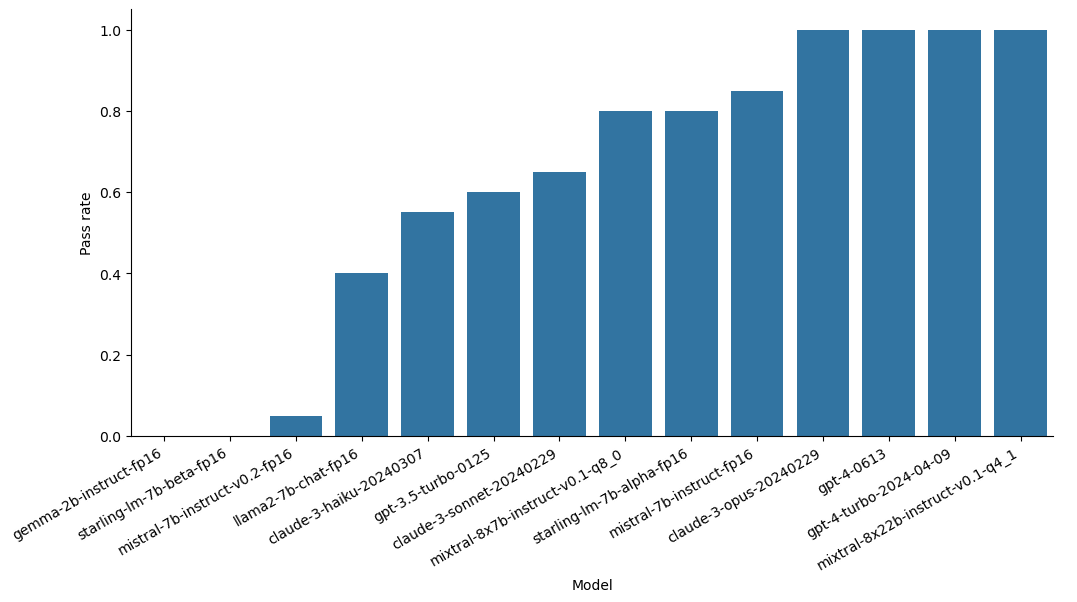

In [25]:
g = sns.catplot(
    data=pass_rate,
    x="model",
    y="pass_rate",
    # hue="prompt",
    kind="bar",
    order=sorted_models,
    errorbar=None,
    aspect=2,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Pass rate")

## Prompt: `candidate`

In [26]:
pass_rate = results[results["prompt"].isin(("candidate",))].groupby(["model"])["passed"].sum().to_frame()

In [27]:
pass_rate = pass_rate.assign(pass_rate=lambda x: x / 140.0)

In [28]:
pass_rate.shape

(14, 2)

In [29]:
pass_rate.head()

,passed,pass_rate
model,,
claude-3-haiku-20240307,77,0.55
claude-3-opus-20240229,140,1.00
claude-3-sonnet-20240229,98,0.70
gemma-2b-instruct-fp16,0,0.00
gpt-3.5-turbo-0125,91,0.65


In [30]:
pass_rate.sort_values("pass_rate")

,passed,pass_rate
model,,
gemma-2b-instruct-fp16,0,0.00
starling-lm-7b-beta-fp16,0,0.00
mistral-7b-instruct-v0.2-fp16,7,0.05
mistral-7b-instruct-fp16,63,0.45
claude-3-haiku-20240307,77,0.55
starling-lm-7b-alpha-fp16,77,0.55
llama2-7b-chat-fp16,84,0.60
gpt-3.5-turbo-0125,91,0.65
claude-3-sonnet-20240229,98,0.70


In [31]:
sorted_models = pass_rate.sort_values("pass_rate").index.get_level_values("model").tolist()

In [32]:
sorted_models[-5:]

['mixtral-8x7b-instruct-v0.1-q8_0',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q4_1']

In [33]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [34]:
# sorted_models[-5:]

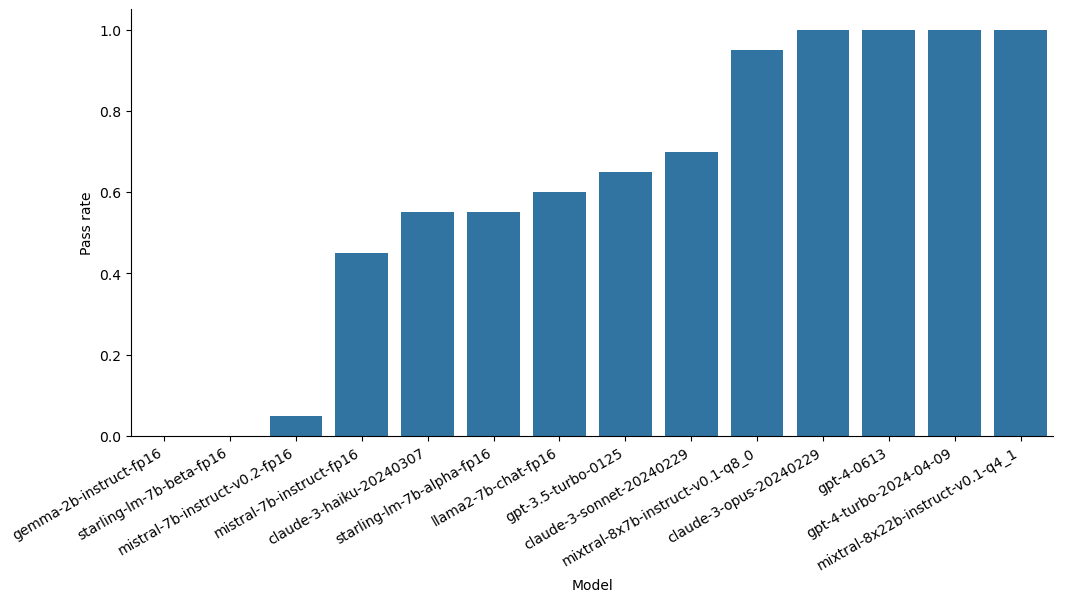

In [35]:
g = sns.catplot(
    data=pass_rate,
    x="model",
    y="pass_rate",
    # hue="prompt",
    kind="bar",
    order=sorted_models,
    errorbar=None,
    aspect=2,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Pass rate")

# Plot: pass rate by prompt

In [77]:
results

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting
...,...,...,...,...,...,...,...,...,...,...
5875,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,False,0.00,Failed,Is a single paragraph,Formatting
5876,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,Doesn't include manuscript title,Formatting
5877,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting
5878,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,Has roughly the same length as input,Formatting


In [78]:
results.groupby(["model", "prompt"]).count()

passed  score_avg  \
model                            prompt                                       
claude-3-haiku-20240307          baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
claude-3-opus-20240229           baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
claude-3-sonnet-20240229         baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
gemma-2b-instruct-fp16           baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
gpt-3.5-turbo-0125               baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
gpt-4-0613                       baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
gpt-4-turbo-2024-04-09           baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
llama2-7b-chat-fp16              baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
mistral-7b-instruct-fp16         baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
mistral-7b-instruct-v0.2-fp16    baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
mixtral-8x22b-instruct-v0.1-q4_1 baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
mixtral-8x7b-instruct-v0.1-q8_0  baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
starling-lm-7b-alpha-fp16        baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   
starling-lm-7b-beta-fp16         baseline                    140        140   
                                 candidate                   140        140   
                                 candidate_with_metadata     140        140   

                                                          test_description  \
model                            prompt                                      
claude-3-haiku-20240307          baseline                              140   
                                 candidate                             140   
                                 candidate_with_metadata               140   
claude-3-opus-20240229           baseline                              140   
                                 candidate                             140   
                                 ca

In [121]:
pass_rate = results[results["prompt"] != "baseline"].groupby(["model", "prompt"])["passed"].sum().to_frame()

In [122]:
pass_rate = pass_rate.assign(pass_rate=lambda x: x / 140.0).reset_index()

In [123]:
pass_rate.shape

(28, 4)

In [124]:
pass_rate.head()

,model,prompt,passed,pass_rate
0,claude-3-haiku-20240307,candidate,77,0.55
1,claude-3-haiku-20240307,candidate_with_metadata,77,0.55
2,claude-3-opus-20240229,candidate,140,1.00
3,claude-3-opus-20240229,candidate_with_metadata,140,1.00
4,claude-3-sonnet-20240229,candidate,98,0.70


In [125]:
pass_rate.sort_values("pass_rate")

,model,prompt,passed,pass_rate
27,starling-lm-7b-beta-fp16,candidate_with_metadata,0,0.00
6,gemma-2b-instruct-fp16,candidate,0,0.00
7,gemma-2b-instruct-fp16,candidate_with_metadata,0,0.00
26,starling-lm-7b-beta-fp16,candidate,0,0.00
19,mistral-7b-instruct-v0.2-fp16,candidate_with_metadata,7,0.05
18,mistral-7b-instruct-v0.2-fp16,candidate,7,0.05
15,llama2-7b-chat-fp16,candidate_with_metadata,56,0.40
16,mistral-7b-instruct-fp16,candidate,63,0.45
24,starling-lm-7b-alpha-fp16,candidate,77,0.55
0,claude-3-haiku-20240307,candidate,77,0.55


In [127]:
sorted_models = pass_rate[pass_rate["prompt"] == "candidate_with_metadata"].sort_values("pass_rate")["model"].tolist()

In [128]:
sorted_models[-5:]

['mistral-7b-instruct-fp16',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q4_1']

In [109]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [129]:
# sorted_models[-5:]

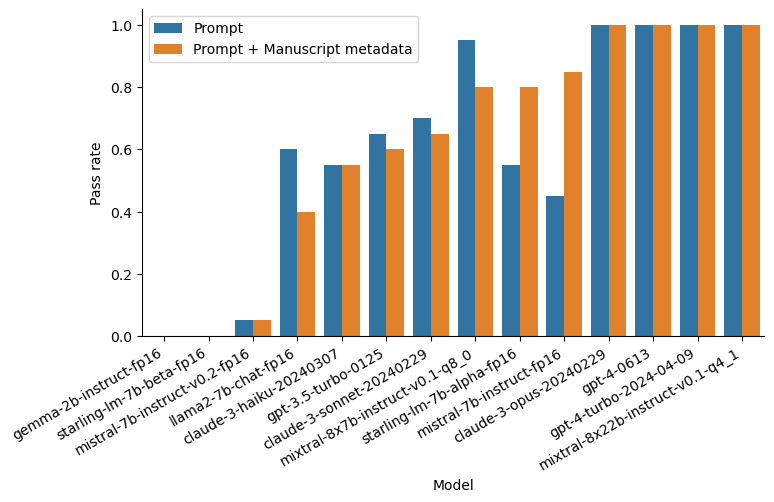

In [138]:
g = sns.catplot(
    data=pass_rate,
    x="model",
    y="pass_rate",
    hue="prompt",
    kind="bar",
    order=sorted_models,
    errorbar=None,
    height=4,
    aspect=2,
    legend_out=False,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Pass rate")

leg = g.axes.flat[0].get_legend()
leg.set_title("")
new_labels = ['Prompt', 'Prompt + Manuscript metadata']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

In [133]:
leg = g.axes.flat[0].get_legend()

In [135]:
leg.get_title()

Text(0, 0, 'prompt')

# Plot: pass rate by test_description

In [36]:
results

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting
...,...,...,...,...,...,...,...,...,...,...
5875,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,False,0.00,Failed,Is a single paragraph,Formatting
5876,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,Doesn't include manuscript title,Formatting
5877,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting
5878,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,Has roughly the same length as input,Formatting


In [37]:
results.groupby(["model", "prompt", "test_description"]).count()

passed  \
model                    prompt                  test_description                              
claude-3-haiku-20240307  baseline                Describes method before results          35   
                                                 Ends with interpretation of results      35   
                                                 Has no spelling errors                   35   
                                                 Starts with background                   35   
                         candidate               Describes method before results          35   
...                                                                                      ...   
starling-lm-7b-beta-fp16 candidate               Starts with background                   35   
                         candidate_with_metadata Describes method before results          35   
                                                 Ends with interpretation of results      35   
                                                 Has no spelling errors                   35   
                                                 Starts with background                   35   

                                                                                      score_avg  \
model                    prompt                  test_description                                 
claude-3-haiku-20240307  baseline                Describes method before results             35   
                                                 Ends with interpretation of results         35   
                                                 Has no spelling errors                      35   
                                                 Starts with background                      35   
                         candidate               Describes method before results             35   
...                                                                                         ...   
starling-lm-7b-beta-fp16 candidate               Starts with background                      35   
                         candidate_with_metadata Describes method before results             35   
                                                 Ends with interpretation of results         35   
                                                 Has no spelling errors                      35   
                                                 Starts with background                      35   

                                                                                      comp_pass  \
model                    prompt                  test_description                                 
claude-3-haiku-20240307  baseline                Describes method before results             35   
                                                 Ends with interpretation of results         35   
                                                 Has no spelling errors                      35   
                                                 Starts with background                      35   
                         candidate               Describes method before results             35   
...                                                                                         ...   
starling-lm-7b-beta-fp16 candidate               Starts with background                      35   
                         candidate_with_metadata Describes method before results             35   
                                                 Ends with interpretation of results         35   
                                                 Has no spelling errors                      35   
                                                 Starts with background                      35   

                                                                                      comp_score  \
model                    prompt                  test_description                                  
claude-3-haiku-20240307  baseline                Describes me

## Prompt: `candidate_with_metadata`

In [38]:
pass_rate = results[results["prompt"].isin(("candidate_with_metadata",))].groupby(["model", "test_description"])["passed"].sum().to_frame()

In [39]:
pass_rate = pass_rate.assign(pass_rate=lambda x: x / 35.0)

In [40]:
pass_rate.shape

(56, 2)

In [41]:
pass_rate.head()

passed  pass_rate
model                   test_description                                      
claude-3-haiku-20240307 Describes method before results          35        1.0
                        Ends with interpretation of results      28        0.8
                        Has no spelling errors                    7        0.2
                        Starts with background                    7        0.2
claude-3-opus-20240229  Describes method before results          35        1.0

In [42]:
pass_rate.sort_values("pass_rate")

passed  \
model                            test_description                              
starling-lm-7b-beta-fp16         Starts with background                    0   
mistral-7b-instruct-v0.2-fp16    Has no spelling errors                    0   
                                 Starts with background                    0   
llama2-7b-chat-fp16              Starts with background                    0   
starling-lm-7b-beta-fp16         Has no spelling errors                    0   
gpt-3.5-turbo-0125               Describes method before results           0   
gemma-2b-instruct-fp16           Starts with background                    0   
                                 Has no spelling errors                    0   
                                 Ends with interpretation of results       0   
                                 Describes method before results           0   
mistral-7b-instruct-v0.2-fp16    Ends with interpretation of results       0   
starling-lm-7b-beta-fp16         Ends with interpretation of results       0   
                                 Describes method before results           0   
mistral-7b-instruct-v0.2-fp16    Describes method before results           7   
llama2-7b-chat-fp16              Describes method before results           7   
claude-3-haiku-20240307          Has no spelling errors                    7   
                                 Starts with background                    7   
starling-lm-7b-alpha-fp16        Describes method before results          14   
gpt-3.5-turbo-0125               Starts with background                   14   
mixtral-8x7b-instruct-v0.1-q8_0  Ends with interpretation of results      14   
claude-3-sonnet-20240229         Has no spelling errors                   14   
                                 Ends with interpretation of results      21   
                                 Describes method before results          21   
mistral-7b-instruct-fp16         Starts with background                   21   
llama2-7b-chat-fp16              Has no spelling errors                   21   
mixtral-8x7b-instruct-v0.1-q8_0  Starts with background                   28   
claude-3-haiku-20240307          Ends with interpretation of results      28   
starling-lm-7b-alpha-fp16        Starts with background                   28   
mistral-7b-instruct-fp16         Ends with interpretation of results      28   
llama2-7b-chat-fp16              Ends with interpretation of results      28   
starling-lm-7b-alpha-fp16        Ends with interpretation of results      35   
mixtral-8x22b-instruct-v0.1-q4_1 Ends with interpretation of results      35   
                                 Starts with background                   35   
mixtral-8x7b-instruct-v0.1-q8_0  Describes method before results          35   
                                 Has no spelling errors                   35   
starling-lm-7b-alpha-fp16        Has no spelling errors                   35   
mixtral-8x22b-instruct-v0.1-q4_1 Describes method before results          35   
                                 Has no spelling errors                   35   
claude-3-haiku-20240307          Describes method before results          35   
mistral-7b-instruct-fp16         Describes method before results          35   
claude-3-opus-20240229           Describes method before results          35   
                                 Ends with interpretation of results      35   
                                 Has no spelling errors                   35   
                                 Starts with background                   35   
claude-3-sonnet-20240229         Starts with background                   35   
gpt-3.5-turbo-0125               Ends with interpretation of results      35   
mistral-7b-instruct-fp16         Has no spelling errors                   35   
gpt-3.5-turbo-0125               Has no spelling errors                   35   
gpt-4-0613                       Ends with interpretation of results  

In [43]:
sorted_models = pass_rate.sort_values("pass_rate").index.get_level_values("model").tolist()

In [44]:
sorted_models[-5:]

['gpt-4-turbo-2024-04-09',
 'gpt-4-turbo-2024-04-09',
 'gpt-4-turbo-2024-04-09',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09']

In [45]:
sorted_models = list(dict.fromkeys(sorted_models))

In [46]:
sorted_models[-5:]

['mistral-7b-instruct-fp16',
 'mixtral-8x22b-instruct-v0.1-q4_1',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09']

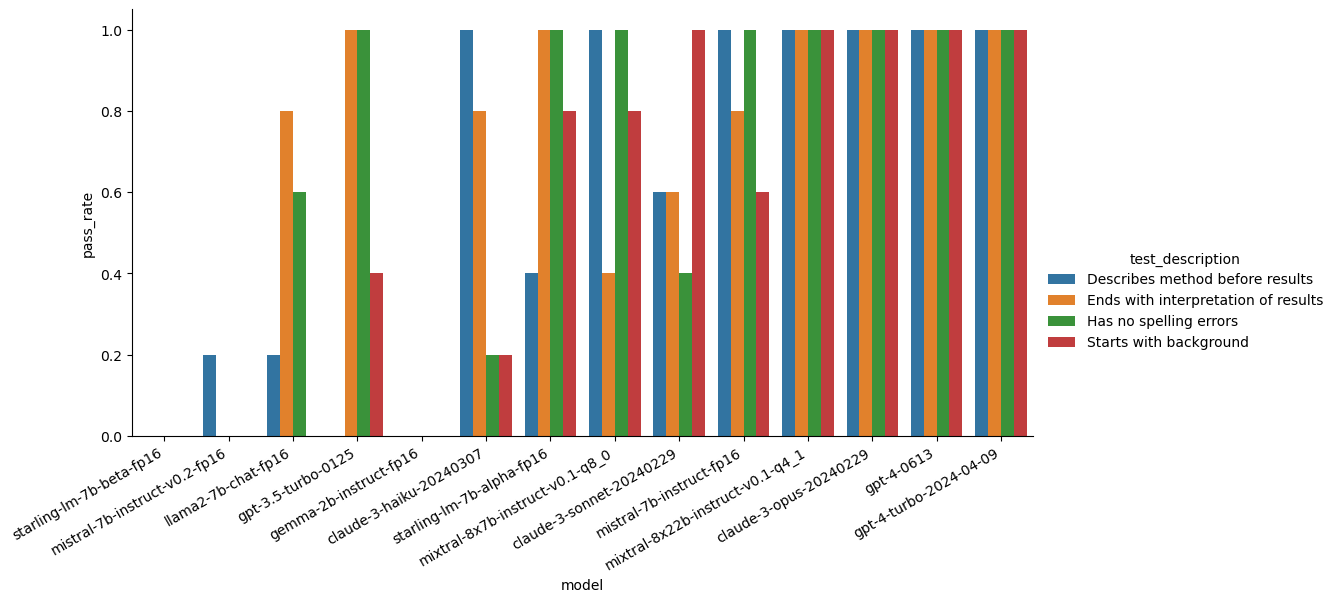

In [47]:
g = sns.catplot(
    data=pass_rate,
    x="model",
    y="pass_rate",
    hue="test_description",
    kind="bar",
    order=sorted_models,
    errorbar=None,
    aspect=2,
)
g.set_xticklabels(rotation=30, ha="right")

# Plot: score

In [48]:
results

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting
...,...,...,...,...,...,...,...,...,...,...
5875,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,False,0.00,Failed,Is a single paragraph,Formatting
5876,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,Doesn't include manuscript title,Formatting
5877,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting
5878,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,Has roughly the same length as input,Formatting


## Prompt: `candidate_with_metadata`

In [49]:
df = results[results["prompt"].isin(("candidate_with_metadata",))]#.groupby(["model"])["score_avg"].sum().to_frame()

In [50]:
df.shape

(1960, 10)

In [51]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting


In [52]:
df.groupby("model")["score_avg"].mean().sort_values()

model
gemma-2b-instruct-fp16              0.310714
llama2-7b-chat-fp16                 0.375000
gpt-3.5-turbo-0125                  0.383929
starling-lm-7b-beta-fp16            0.416071
mistral-7b-instruct-v0.2-fp16       0.439286
claude-3-haiku-20240307             0.451786
starling-lm-7b-alpha-fp16           0.478571
mistral-7b-instruct-fp16            0.482143
claude-3-sonnet-20240229            0.483929
mixtral-8x7b-instruct-v0.1-q8_0     0.491071
claude-3-opus-20240229              0.500000
gpt-4-0613                          0.500000
gpt-4-turbo-2024-04-09              0.500000
mixtral-8x22b-instruct-v0.1-q4_1    0.500000
Name: score_avg, dtype: float64

In [53]:
sorted_models = df.groupby("model")["score_avg"].mean().sort_values().index.get_level_values("model").tolist()

In [54]:
sorted_models[-5:]

['mixtral-8x7b-instruct-v0.1-q8_0',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q4_1']

In [55]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [56]:
# sorted_models[-5:]

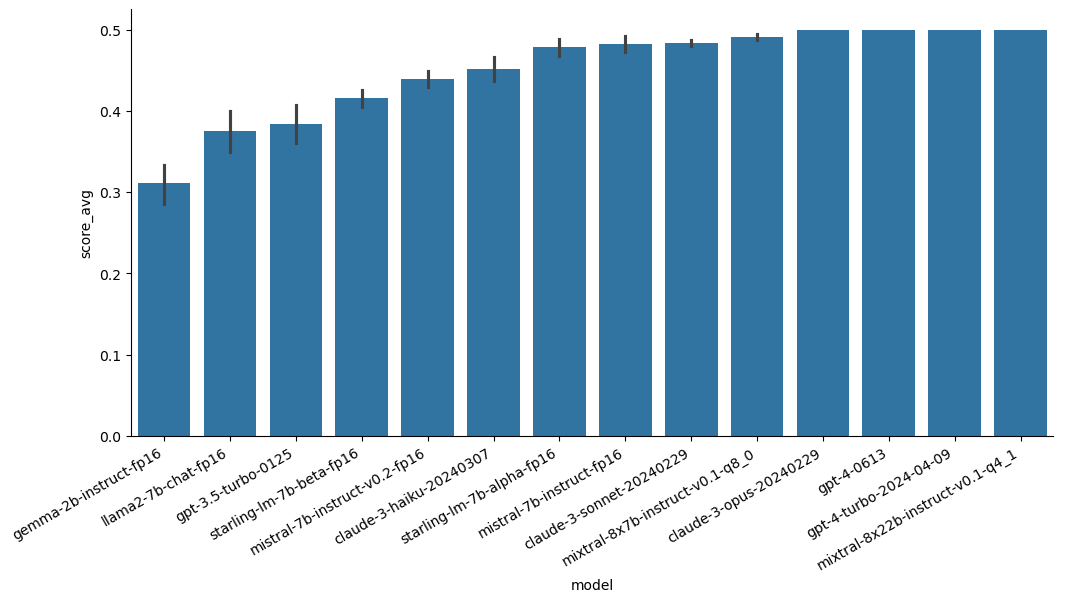

In [57]:
g = sns.catplot(
    data=df,
    x="model",
    y="score_avg",
    # hue="prompt",
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.set_xticklabels(rotation=30, ha="right")

## Prompt: `candidate`

In [58]:
df = results[results["prompt"].isin(("candidate",))]#.groupby(["model"])["score_avg"].sum().to_frame()

In [59]:
df.shape

(1960, 10)

In [60]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
14,claude-3-haiku-20240307,True,0.5,candidate,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
15,claude-3-haiku-20240307,True,0.5,candidate,Has no spelling errors,True,0.25,Passed,Ends with a period,Formatting
16,claude-3-haiku-20240307,True,0.5,candidate,Has no spelling errors,True,0.25,Passed,Is a single paragraph,Formatting
17,claude-3-haiku-20240307,True,0.5,candidate,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
18,claude-3-haiku-20240307,True,0.5,candidate,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting


In [61]:
df.groupby("model")["score_avg"].mean().sort_values()

model
gemma-2b-instruct-fp16              0.296429
mistral-7b-instruct-fp16            0.387500
llama2-7b-chat-fp16                 0.394643
gpt-3.5-turbo-0125                  0.400000
mistral-7b-instruct-v0.2-fp16       0.408929
starling-lm-7b-beta-fp16            0.421429
starling-lm-7b-alpha-fp16           0.428571
claude-3-haiku-20240307             0.471429
claude-3-sonnet-20240229            0.483929
mixtral-8x7b-instruct-v0.1-q8_0     0.498214
claude-3-opus-20240229              0.500000
gpt-4-0613                          0.500000
gpt-4-turbo-2024-04-09              0.500000
mixtral-8x22b-instruct-v0.1-q4_1    0.500000
Name: score_avg, dtype: float64

In [62]:
sorted_models = df.groupby("model")["score_avg"].mean().sort_values().index.get_level_values("model").tolist()

In [63]:
sorted_models[-5:]

['mixtral-8x7b-instruct-v0.1-q8_0',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q4_1']

In [64]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [65]:
# sorted_models[-5:]

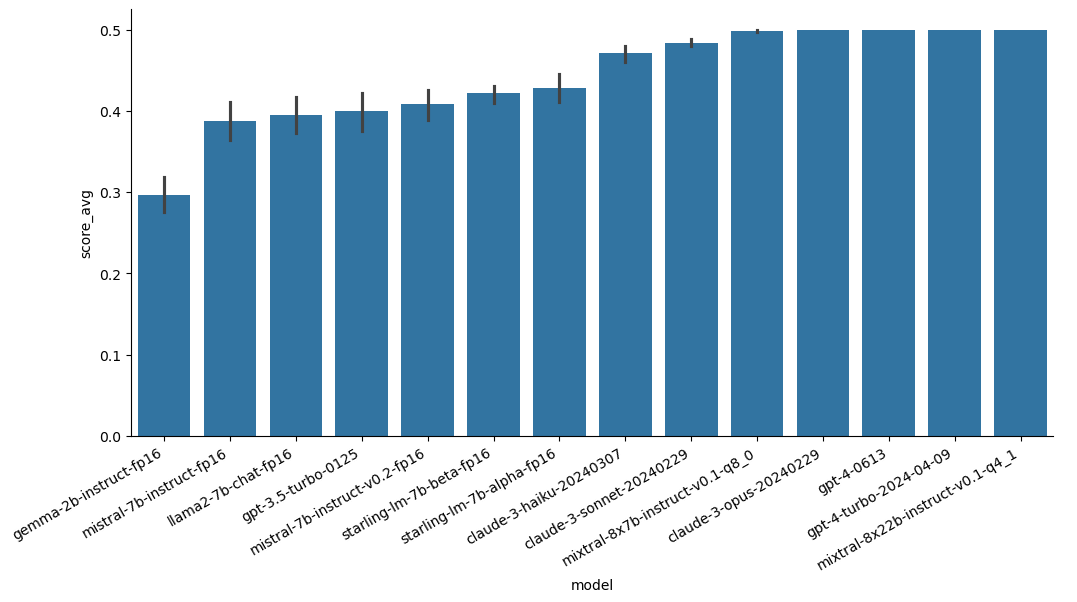

In [66]:
g = sns.catplot(
    data=df,
    x="model",
    y="score_avg",
    # hue="prompt",
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.set_xticklabels(rotation=30, ha="right")

# Plot: comp_score

In [139]:
results

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting
...,...,...,...,...,...,...,...,...,...,...
5875,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,False,0.00,Failed,Is a single paragraph,Formatting
5876,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,Doesn't include manuscript title,Formatting
5877,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting
5878,starling-lm-7b-beta-fp16,False,0.428571,candidate,Ends with interpretation of results,True,0.25,Passed,Has roughly the same length as input,Formatting


## Prompt: `candidate_with_metadata`

In [150]:
df = results[results["prompt"].isin(("candidate_with_metadata",))]#.groupby(["model"])["score_avg"].sum().to_frame()

In [151]:
df.shape

(1960, 10)

In [152]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.428571,candidate_with_metadata,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting


In [153]:
df.groupby("model")["comp_score"].mean().sort_values()

model
gemma-2b-instruct-fp16              0.310714
llama2-7b-chat-fp16                 0.375000
gpt-3.5-turbo-0125                  0.383929
starling-lm-7b-beta-fp16            0.416071
mistral-7b-instruct-v0.2-fp16       0.439286
claude-3-haiku-20240307             0.451786
starling-lm-7b-alpha-fp16           0.478571
mistral-7b-instruct-fp16            0.482143
claude-3-sonnet-20240229            0.483929
mixtral-8x7b-instruct-v0.1-q8_0     0.491071
claude-3-opus-20240229              0.500000
gpt-4-0613                          0.500000
gpt-4-turbo-2024-04-09              0.500000
mixtral-8x22b-instruct-v0.1-q4_1    0.500000
Name: comp_score, dtype: float64

In [154]:
sorted_models = df.groupby("model")["comp_score"].mean().sort_values().index.get_level_values("model").tolist()

In [155]:
sorted_models[-5:]

['mixtral-8x7b-instruct-v0.1-q8_0',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q4_1']

In [146]:
# sorted_models = list(dict.fromkeys(sorted_models))

In [164]:
df.loc[df["comp_type"] == "Formatting", "comp_score"] = df.loc[df["comp_type"] == "Formatting", "comp_score"] / 0.25
df.loc[df["comp_type"] == "Spelling/grammar", "comp_score"] = df.loc[df["comp_type"] == "Spelling/grammar", "comp_score"] / 2.0
df.loc[df["comp_type"] == "Structure", "comp_score"] = df.loc[df["comp_type"] == "Structure", "comp_score"] / 2.0

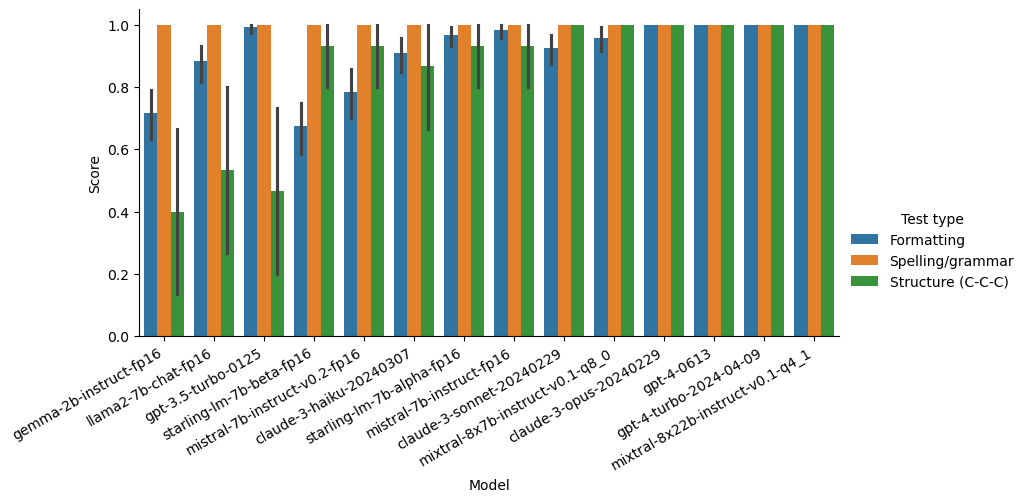

In [167]:
g = sns.catplot(
    data=df,
    x="model",
    y="comp_score",
    hue="comp_type",
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    height=4,
    aspect=2,
    legend_out=True,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Score")

# leg = g.axes.flat[0].get_legend()
# leg.set_title("")
g._legend.set_title("Test type")
new_labels = ['Formatting', 'Spelling/grammar', 'Structure (C-C-C)']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)